<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Modeling And Simulation   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 6: Stochastic Processes and Markov-Chain
In this Notebook you learn how to apply  Markov-Chain method to silmulate stochastic processes. 

### Stochastic Process:
<ul>
<li>A stochastic process is a process that changes in time with some kind of randomness.
<li>  Formally, it is a family of random variables, $\{X(t) : t \in T\}$, where $t$ usually denotes time. That is, at every time $t$ in the set $T$, a random number $X(t)$ is observed.

</ul>

### Markoc-Chain: 
<ul>
<li>Markov Process is a stochastic process that satisfies the Markov property that is the future of a process does not depend on its past, only on its present:
    $X_{t+1} \text{ depends only on } X_t$.
     <figure>
  <IMG src="figures/ch6-markov-chain-graph.png" WIDTH=300 height="300" ALIGN="right">
</figure>
<li> Formally:   $P(X_{t+1} = s|X_t = s_t,X_{t−1} = s_{t−1},...,X_0 = s_0) = P(X_{t+1} = s|X_t = s_t)$ ==> The probability that the system will be in state $s$ at time $t+1$ knowing all the history of the states' system depends only on the state $s_t$ of the system at time $t$.
<li> A Markov-Chain Process is generally represented using a graph representation with graph nodes reprsent the states of the system and the links between the states represent the probability that the system will change from one state to another in a given time.
<li> We can also summarize the Graph probabilities using the Transition Matrix:
    $ \mathcal{P}_{ij} = \left( \begin{matrix} p_{00} & p_{01} & 0 \\
                                               p_{10} & p_{11} & p_{12} \\
                                               p_{20} & p_{21} & p_{22}
                                 \end{matrix} \right)$
<li> Now to predict the probability of making a transition from state $S_i$ to state $S_j$ over $t$ steps?  I.e. what is $P(X_t=S_j|X_0=S_i)$, we apply the $t-$steps transitions theorem that is:
$P(X_t =S_j|X_0 =S_i)= \mathcal{P}^t_{ij}$.
</ul>
    
#### Example: The Weather Status:
We want to model the status of the weather observed each DAY. We suppose that in a given DAY, the status of the weather will be  SUNNY or RAINY. Therefore, the state space $S$ of this system is: $S=\{'SUNNY', 'RAINY'\}$, and we define $X(day_i) =\{’Sunny’ or ’Rainy’\}$ as Random Variables that varies with the $day_i$.
<figure>
  <IMG src="figures/ch6-markov-chain-wthr-exp.png" WIDTH=380 height="300" ALIGN="right">
</figure>
<ul>
<li>Given the graph reprsentation of this system and its probability transition matrix, predict the probability that the weather will be RAINY on day 3 knowing that it is SUNNY on day 1. 
 $\mathcal{P}_{ij} = \left( \begin{matrix} 
                             0.7 & 0.3 \\ 
                             0.6 & 0.4 
                             \end{matrix} 
                      \right)$   


  Solution:  $P(X_{day_3} =RAINY|X_{day_1} =SUNNY)= \mathcal{P}^{2}_{SUNNY,RAINY}$
    
 <figure>
  <IMG src="figures/ch6-markov-property.png" WIDTH=400 height="300" ALIGN="right">
</figure>
  
 <figure>
  <IMG src="figures/t-step.png" WIDTH=400 height="300" ALIGN="right">
</figure>
    
 $P(X_{day_3} =RAINY|X_{day_1} =SUNNY)= \left( 
                                             \begin{matrix} 
                                                 0.7 & 0.3 \\ 
                                                 . & . 
                                              \end{matrix} 
                                           \right)* 
                                         \left( 
                                             \begin{matrix} 
                                                 . & 0.3 \\ 
                                                 . & 0.4 
                                              \end{matrix} 
                                           \right)=0.33$
    
 
  <li> Simularly, find all the probabilities of the weather status on day 3 given status on day 1.
      Solution:
      $\mathcal{P}^{2}_{i,j}= \left( 
                                  \begin{matrix} 
                                      0.7 & 0.3 \\ 
                                      0.6 & 0.4 
                                   \end{matrix} 
                                \right)* 
                                \left( 
                                    \begin{matrix} 
                                        0.7 & 0.3 \\ 
                                        0.6 & 0.4 
                                     \end{matrix} 
                                  \right)=
                                  \left( 
                                      \begin{matrix} 
                                           0.67 &0.33 \\
                                            0.66 &0.34
                                       \end{matrix} 
                                    \right)$    
  <ul/>
     
     
     
     
     
     

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Transition Matrix
transitionMatrix=np.array([[0.8, 0.2],
                       [0.6, 0.4]
          ])

#confirmaing that each row sums to one:
assert transitionMatrix[0, :].sum() == 1
assert transitionMatrix[1, :].sum() == 1

#Compute the 2-step transition matrix P**2 using dot product 
twoStepTransionMatrix=np.dot(transitionMatrix,transitionMatrix)
#Alternatively you can use the @ notation to compute the dot product
twoStepTransionMatrix=transitionMatrix @ transitionMatrix 

#Get the appropriet row and column: 
#Note that row_i=SUNNY (saved in the first row)
#Note that column_j=RAINY (saved in the second column)
prob=twoStepTransionMatrix[0,1]
print("Prediction of day 3 to be Rainy knowing that day 1 is sunny: {:.6f}".format(prob))
print("2-step transitions Probability of the weather status in day 3 given its status in day 1:")
print(twoStepTransionMatrix)

Prediction of day 3 to be Rainy knowing that day 1 is sunny: 0.240000
2-step transitions Probability of the weather status in day 3 given its status in day 1:
[[0.76 0.24]
 [0.72 0.28]]


### Challenge 01:
Change the codes above to:
<ol type = "1">
         <li>Predict the probability that the weather will be SUNNY on day 3 knowing that it is SUNNY on day 1.   </li>
         <li>Predict the probability that the weather will be RAINY on day 4 knowing that it is SUNNY on day 1.</li>  
    <li>Predict the probability that the weather will be RAINY on day 5 knowing that it is SUNNY on day 3.</li>     
</ol>






In [2]:
P2 = transitionMatrix @ transitionMatrix
# 1. Probabilité SUNNY le jour 3 sachant SUNNY le jour 1
prob_1 = P2[0, 0]  # SUNNY→SUNNY en 2 étapes
print(f"1. P(SUNNY jour3 | SUNNY jour1) = {prob_1:.4f}")

1. P(SUNNY jour3 | SUNNY jour1) = 0.7600


In [3]:
P3 = P2 @ transitionMatrix 
# 2. Probabilité RAINY le jour 4 sachant SUNNY le jour 1
prob_2 = P3[0, 1]  # SUNNY→RAINY en 3 étapes
print(f"2. P(RAINY jour4 | SUNNY jour1) = {prob_2:.4f}")

2. P(RAINY jour4 | SUNNY jour1) = 0.2480


In [ ]:
prob_3 = P2[0, 1]  # SUNNY→RAINY en 2 étapes (jour3→jour5)
print(f"3. P(RAINY jour5 | SUNNY jour3) = {prob_3:.4f}")

3. P(RAINY jour5 | SUNNY jour3) = 0.2400


### Forcasting the Weather Status using Markoc-Chain: 
Let's now forecast the weateher status for a 365 days using a Markov-Chain model in python.



Starting weather:  Rainy


Text(0, 0.5, 'Weather Status')

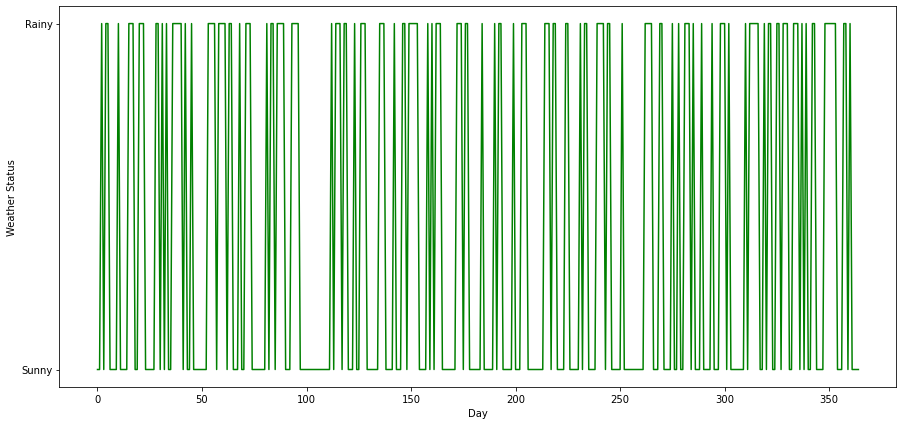

In [13]:
# A simple Markov chain model for the weather in Python

import numpy as np
import random as rm


# Let's define the statespace
states = ["Sunny","Rainy"]

# Possible sequences of events
transitionName = [["SS","SR"],["RR","RS"]]

# Probabilities matrix (transition matrix)
transitionMatrix = np.array([[0.7, 0.3],
                             [0.6, 0.4]
                            ])


#confirmaing that each row sums to one:
assert transitionMatrix[0, :].sum() == 1
assert transitionMatrix[1, :].sum() == 1


# A functions which implements the Markov model to forecast the weather
def weatherForecast(days):
    # start by default from a randomly init states otherwise. specify it in the calling function
    init=rm.choice(states)
    weatherList=[]
    weatherToday = init
    i = 0
    print("Starting weather: ",weatherToday)
    while i < days:
        if weatherToday == "Sunny":
            change = np.random.choice(transitionName[0],p=transitionMatrix[0])
            if change == "SS":
                pass
            else:
                weatherToday = "Rainy"   
        elif weatherToday == "Rainy":
            change = np.random.choice(transitionName[1],p=transitionMatrix[1])
            if change == "RR":
                pass
            else:
                weatherToday = "Sunny"

        weatherList.append(weatherToday)
        i += 1
        
        
    return  weatherList 
        

# We forecast the weather for 365 days
NbrOfDays=365

weatherStates  =weatherForecast(NbrOfDays)


plt.figure(figsize=(15,7))
plt.plot(weatherStates, color='g')
plt.xlabel('Day')
plt.ylabel('Weather Status')

(array([215.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

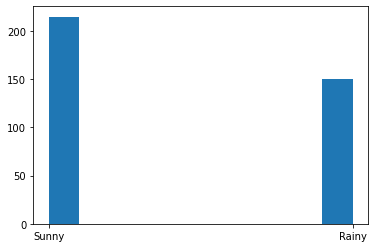

In [14]:
plt.hist(weatherStates)

### Challenge 02:

<figure>
  <IMG src="figures/MC-challenge2.png" WIDTH=400 height="300" ALIGN="right">
</figure>
    
We want to model a more complex weather status of a given town. The graph transition of this model is illustrated in the figure in side. The states are (R, F, C, S) for (Rainy, Foggy, Cloudy, Sunny) respectively.
<ol type = "1">
         <li>Define the probabilty transition Matrix.   </li>
         <li>Predict the probability that the weather will be Foggy on day 4 knowing that it is SUNNY on day 1.</li>  
    <li>Predict the probability that the weather will be Cloudy on day 5 knowing that it is SUNNY on day 3.</li>     <li> Simulate and plot the weather status of this model for a total duration of  two (2) years.
</ol>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la matrice de transition
P = np.array([
    [5/8, 1/4, 0, 1/8],   # Rainy → [R, F, C, S]
    [2/3, 0, 1/3, 0],     # Foggy → [R, F, C, S]
    [0, 1/6, 1/3, 1/2],   # Cloudy → [R, F, C, S]
    [1/4, 0, 3/4, 0]      # Sunny → [R, F, C, S]
])

# Vérification que chaque ligne somme à 1
for i in range(4):
    assert np.isclose(P[i].sum(), 1), f"La ligne {i} ne somme pas à 1"

In [8]:
# Calcul de P^3 (3 étapes entre jour1 et jour4)
P3 = np.linalg.matrix_power(P, 3)

# Sunny (état 3) → Foggy (état 1) en 3 étapes
prob_foggy_day4 = P3[3, 1]
print(f"2. P(Foggy jour4 | Sunny jour1) = {prob_foggy_day4:.4f}")

2. P(Foggy jour4 | Sunny jour1) = 0.0807


In [9]:
# Calcul de P^2 (2 étapes entre jour3 et jour5)
P2 = np.linalg.matrix_power(P, 2)

# Sunny (état 3) → Cloudy (état 2) en 2 étapes
prob_cloudy_day5 = P2[3, 2]
print(f"3. P(Cloudy jour5 | Sunny jour3) = {prob_cloudy_day5:.4f}")

3. P(Cloudy jour5 | Sunny jour3) = 0.2500


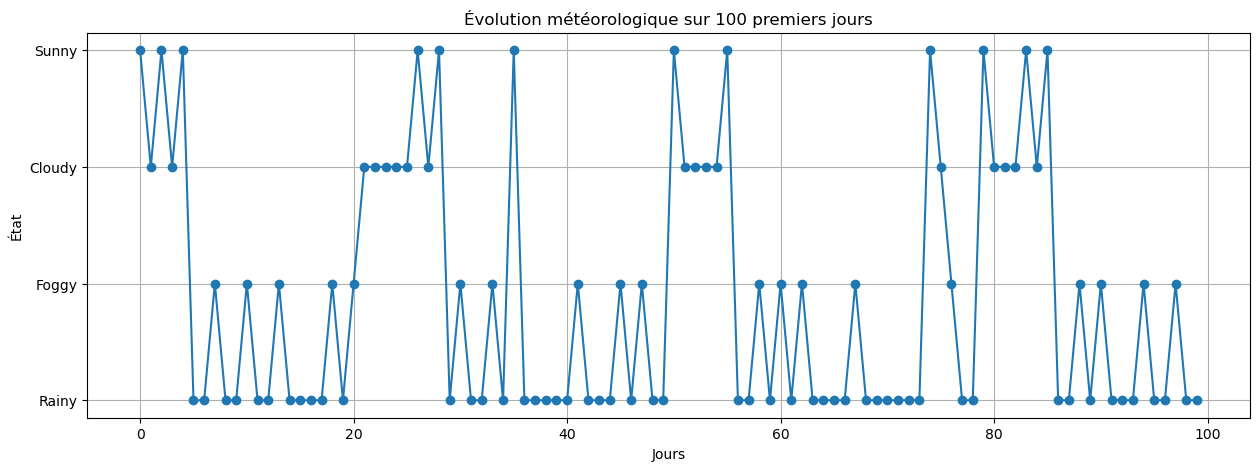


Distribution stationnaire:
Rainy: 0.3810
Foggy: 0.1429
Cloudy: 0.2857
Sunny: 0.1905


In [10]:
# Simulation
def simulate_weather(P, days=730):
    states = []
    current_state = 3  # Commence par Sunny (état 3)
    for _ in range(days):
        states.append(current_state)
        current_state = np.random.choice(4, p=P[current_state])
    return states

# Labels pour les états
weather_labels = ['Rainy', 'Foggy', 'Cloudy', 'Sunny']

# Simulation et visualisation
states = simulate_weather(P)
plt.figure(figsize=(15, 5))
plt.plot(states[:100], 'o-')  # Affiche les 100 premiers jours pour lisibilité
plt.yticks([0, 1, 2, 3], weather_labels)
plt.title('Évolution météorologique sur 100 premiers jours')
plt.xlabel('Jours')
plt.ylabel('État')
plt.grid(True)
plt.show()

# Distribution stationnaire (optionnel)
eigenvals, eigenvecs = np.linalg.eig(P.T)
stationary = eigenvecs[:, np.isclose(eigenvals, 1)].reshape(4)
stationary /= stationary.sum()
print("\nDistribution stationnaire:")
for i, prob in enumerate(stationary):
    print(f"{weather_labels[i]}: {prob:.4f}")

### Challenge 03: Supermarket Customer Journey Simulation
You are working on a project that involves simulating customer behavior in a supermarket using a Markov chain model. The simulation represents customer transitions between various states, which correspond to different sections of the supermarket: ['entrance', 'drinks', 'dairy', 'fruit', 'spices', 'checkout'] as follows:

<figure>
  <IMG src="figures/customer_simulation.gif" WIDTH=400 height="300" ALIGN="right">
</figure>

These transitions are governed by the following probabilities derived from historical data over one week. The simulation tracks customer movements at one-minute intervals as follows:

<figure>
  <IMG src="figures/probability_transition_matrix.png" WIDTH=400 height="300" ALIGN="right">
</figure>

Simulate the behavior of customers in a supermarket using the Markov chain model. Your task involves the following:

#### Objectives:
* Define the transition matrix.

* Implement a function to simulate customer transitions between states based on the current state and the transition probabilities.

* Simulate the customer journey for 10 minutes, starting from the entrance state.

* Track and display the sequence of states visited by the customer during the simulation.

In [11]:
import numpy as np

# 1. Définir les états
states = ['entrance', 'drinks', 'dairy', 'fruit', 'spices', 'checkout']

# 2. Définir la matrice de transition
P = np.array([
    [0.0, 0.10, 0.13, 0.31, 0.46, 0.0],  # entrance
    [0.0, 0.60, 0.01, 0.09, 0.09, 0.21], # drinks
    [0.0, 0.06, 0.74, 0.05, 0.05, 0.10], # dairy
    [0.0, 0.05, 0.10, 0.60, 0.05, 0.20], # fruit
    [0.0, 0.16, 0.20, 0.09, 0.40, 0.15], # spices
    [0.0, 0.00, 0.00, 0.00, 0.00, 1.00]   # checkout (état final)
])

# 3. Fonction pour simuler un client pendant 10 minutes
def simulate_customer(P, start_state=0, minutes=10):
    state_sequence = []
    current_state = start_state  # Commence à 'entrance' qui est l'état 0
    
    for _ in range(minutes):
        state_sequence.append(states[current_state])  # Sauvegarder l'état actuel
        # Choisir le prochain état selon les probabilités de l'état actuel
        current_state = np.random.choice(len(states), p=P[current_state])
        
    return state_sequence

# 4. Simuler un client
journey = simulate_customer(P, start_state=0, minutes=10)

# 5. Afficher le trajet du client
print("Customer Journey:")
for minute, location in enumerate(journey, start=1):
    print(f"Minute {minute}: {location}")


Customer Journey:
Minute 1: entrance
Minute 2: fruit
Minute 3: fruit
Minute 4: fruit
Minute 5: fruit
Minute 6: checkout
Minute 7: checkout
Minute 8: checkout
Minute 9: checkout
Minute 10: checkout
